# Simple Tutorial on Machine Learning with Keras

In this tutorial, we will create a simple Multi-Layer Perceptron (MLP) using Keras to interpolate a non-linear function.

## 1. Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

2024-06-11 13:52:47.259890: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 13:52:47.261951: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 13:52:47.288754: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 13:52:47.816876: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 2. Generate Non-Linear Data

In [2]:
# Generate data
def generate_data(n_samples=1000):
    X = np.linspace(-1, 1, n_samples)
    y = X**3 + np.random.normal(0, 0.1, n_samples)
    return X, y

X, y = generate_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for Keras
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

## 3. Build the MLP Model Using Keras

Now, we build the MLP model using Keras. This model consists of an input layer, two hidden layers, and an output layer.

- **Input Layer**: The input shape is `(1,)` since we have a single feature.
- **Hidden Layer 1**: This layer has 64 neurons with ReLU activation.
- **Hidden Layer 2**: This layer also has 64 neurons with ReLU activation.
- **Output Layer**: This layer has 1 neuron since we are predicting a single value.

### Detailed Description

- **Input Layer**: `Dense(64, activation='relu', input_shape=(1,))`
  - **Input Shape**: `(1,)` indicating one input feature.
  - **Number of Neurons**: 64
  - **Activation Function**: ReLU

- **Hidden Layer 1**: `Dense(64, activation='relu')`
  - **Number of Neurons**: 64
  - **Activation Function**: ReLU

- **Hidden Layer 2**: `Dense(64, activation='relu')`
  - **Number of Neurons**: 64
  - **Activation Function**: ReLU

- **Output Layer**: `Dense(1)`
  - **Number of Neurons**: 1
  - **Activation Function**: None (Linear Activation)


![FFNN](https://editor.analyticsvidhya.com/uploads/29113Architecture.jpg)

In [3]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Summary of the model
model.summary()

/home/archer/.virtualenvs/base/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Training the Model

The training process of a neural network involves several steps, including forward propagation, loss computation, and backpropagation.

### Forward Propagation

During forward propagation, the input data is passed through the network layer by layer to produce an output. For each layer, the following operations are performed:

1. Compute the weighted sum of inputs and biases.
2. Apply an activation function.

Mathematically, for layer $ l $:

$$ z^{(l)} = W^{(l)}a^{(l-1)} + b^{(l)} $$
$$ a^{(l)} = \sigma(z^{(l)}) $$

where:
- $ z^{(l)} $ is the weighted sum of inputs and biases for layer $ l $,
- $ W^{(l)} $ is the weight matrix for layer $ l $,
- $ a^{(l-1)} $ is the activation from the previous layer,
- $ b^{(l)} $ is the bias for layer $ l $,
- $ \sigma $ is the activation function (e.g., ReLU).

### Loss Computation

The loss function measures the difference between the predicted output and the actual target value. For regression tasks, the Mean Squared Error (MSE) is commonly used:

$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$

where:
- $ m $ is the number of samples,
- $ y_i $ is the actual target value for the $ i $-th sample,
- $ \hat{y}_i $ is the predicted value for the $ i $-th sample.

### Backpropagation

Backpropagation is used to update the weights and biases to minimize the loss. It involves calculating the gradient of the loss function with respect to each weight and bias and updating them using gradient descent.

1. **Compute the Gradient of the Loss with respect to the Output Layer**:

$$ \delta^{(L)} = \frac{\partial \mathcal{L}}{\partial z^{(L)}} = \frac{\partial \mathcal{L}}{\partial a^{(L)}} \cdot \sigma'(z^{(L)}) $$

where:
- $ \delta^{(L)} $ is the error term for the output layer,
- $ \mathcal{L} $ is the loss function,
- $ \sigma' $ is the derivative of the activation function.

2. **Propagate the Gradient Backward through the Network**:

For each layer $ l $ from $ L-1 $ to 1:

$$ \delta^{(l)} = (W^{(l+1)})^T \delta^{(l+1)} \cdot \sigma'(z^{(l)}) $$

3. **Update the Weights and Biases**:

Using the gradients computed, update the weights and biases:

$$ W^{(l)} = W^{(l)} - \alpha \frac{\partial \mathcal{L}}{\partial W^{(l)}} $$
$$ b^{(l)} = b^{(l)} - \alpha \frac{\partial \mathcal{L}}{\partial b^{(l)}} $$

where:
- $ \alpha $ is the learning rate,
- $ \frac{\partial \mathcal{L}}{\partial W^{(l)}} = \delta^{(l)} (a^{(l-1)})^T $,
- $ \frac{\partial \mathcal{L}}{\partial b^{(l)}} = \delta^{(l)} $.

### Training Loop

The training loop iterates over the following steps until convergence or for a fixed number of epochs:

1. Perform forward propagation to compute the predictions.
2. Compute the loss using the loss function.
3. Perform backpropagation to compute the gradients.
4. Update the weights and biases using gradient descent.



In Keras, this process is abstracted and simplified using the `fit` method:

- `X_train`: Represents the input data for training the model. It should be a numpy array.

- `y_train`: Represents the target labels corresponding to the input data. It should be a numpy array.

- `epochs`: Specifies the number of epochs (complete passes through the entire training dataset) to train the model. In this case, the model will be trained for 100 epochs.

- `validation_split`: Specifies the fraction of the training data to be used as validation data during training. For example, if `validation_split=0.2`, 20% of the training data will be used for validation, and the remaining 80% will be used for training.

- `verbose`: Controls the verbosity of the training process. It can take different values:
  - `0`: No output during training.
  - `1`: Display a progress bar showing the training progress for each epoch.
  - `2`: Display one line per epoch showing the training progress.


In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1269 - val_loss: 0.0418
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0375 - val_loss: 0.0369
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.0301 - val_loss: 0.0317
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0253 - val_loss: 0.0268
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0206 - val_loss: 0.0250
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.0192 - val_loss: 0.0206
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.0175 - val_loss: 0.0190
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.0143 - val_loss: 0.0168
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.0143 - val_loss: 0.0158
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.0136 - val_loss: 0.0147
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.0122 - val_loss: 0.0143
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step -

**Explanation:**

1. **Training Loss**: Training loss refers to the error or discrepancy between the predicted output of the model and the actual target values on the training dataset. It represents how well the model is learning the patterns in the training data. During training, the model's parameters (weights and biases) are updated iteratively to minimize this loss. A decreasing training loss indicates that the model is improving its performance on the training data.

2. **Validation Loss**: Validation loss, on the other hand, is the error on a separate dataset called the validation set. This dataset is not used for training but is used to evaluate the model's performance on unseen data. The validation loss provides an estimate of how well the model generalizes to new, unseen examples. Monitoring the validation loss helps prevent overfitting, where the model performs well on the training data but poorly on new data. Ideally, both the training and validation loss should decrease during training, indicating that the model is learning meaningful patterns without overfitting.

By plotting the training and validation loss over epochs, you can visually inspect how the model's performance evolves during training. A large gap between the training and validation loss curves may indicate overfitting, while a similar trend between the two suggests good generalization. Adjustments to the model architecture, regularization techniques, or hyperparameters may be necessary based on these observations to improve the model's performance.

Let's plot the losses!


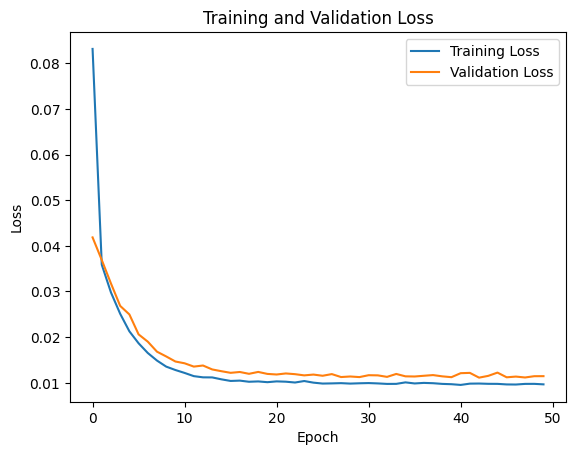

In [5]:
# Extract the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss over epochs
figure = plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## 5. Evaluate the Model

In [6]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.0095
Test Loss: 0.009336018934845924


## 6. Visualize the Results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


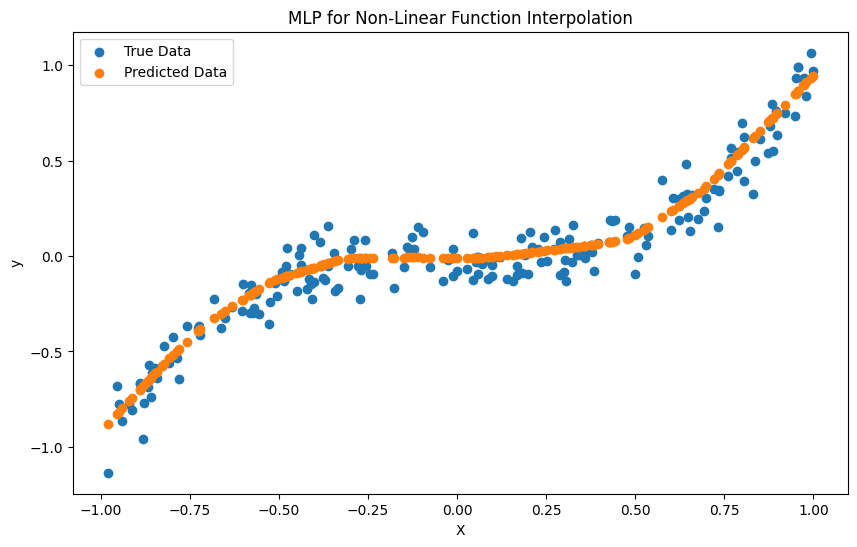

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='True Data')
plt.scatter(X_test, y_pred, label='Predicted Data')
plt.title('MLP for Non-Linear Function Interpolation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

🌟 Congratulations on completing your first ML notebook! You've just taken a significant first step in your journey to mastering machine learning.

Now, as you look at the model fit and the results you've obtained, remember that understanding your model's performance is key to improving it further. Dive into the details of the training process: examine the loss curves, assess the accuracy, and analyze any metrics provided.

But don't stop there! The true learning begins when you start experimenting. Try different hyperparameters, tweak the architecture, or even explore alternative algorithms. By playing with the data and algorithms, you'll gain invaluable insights into how they behave in different scenarios.

Remember, machine learning is as much an art as it is a science. Embrace the iterative nature of the process, and don't be afraid to iterate, iterate, and iterate some more. Each experiment brings you closer to mastery.

So, roll up your sleeves, dive back into the notebook, and let your curiosity guide you. The world of machine learning is yours to explore!

Happy experimenting! 🚀✨

Here are some resources to learn Keras and scikit-learn:

1. **Keras**:
   - [Official Keras documentation](https://keras.io/)
   - [TensorFlow Tutorials](https://www.tensorflow.org/tutorials) (includes Keras)
   - [Introduction to Deep Learning with Keras](https://towardsdatascience.com/introduction-to-deep-learning-with-keras-c7c3d14e1527) by Renu Khandelwal on Towards Data Science

2. **scikit-learn**:
   - [Official scikit-learn documentation](https://scikit-learn.org/stable/documentation.html)
   - [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller and Sarah Guido
   - [Learning Model Building in Scikit-learn](https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/)

